In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FILE = "data.xlsx"

#Create Dataframes from each sheet in data file

staticTare = pd.read_excel(
    FILE,
    sheet_name="StaticTare",
)

noGroundPlate = pd.read_excel(
    FILE,
    sheet_name="NoGroundPlate",
)

dynamicTare = pd.read_excel(
    FILE,
    sheet_name="DynamicTare",
)

threeIN = pd.read_excel(
    FILE,
    sheet_name="3in",
)

fiveIN = pd.read_excel(
    FILE,
    sheet_name="5.625in",
)

# Split the 4 runs

static_tare = df[:][df["Run #"] == "2 w/o Tare"]
static_tare = static_tare.reset_index(drop=True)
# Round alpha to match columns
static_tare["Alpha (deg)"] = static_tare["Alpha (deg)"].round()
# duplicate missing row
duplicate = static_tare[static_tare["Alpha (deg)"] == 2.0]
duplicate_index = duplicate.index.to_list()[0] + 1
duplicate["Alpha (deg)"] = 6.0
static_tare_start = static_tare.iloc[:duplicate_index]
static_tare_end = static_tare.iloc[duplicate_index:]
static_tare = pd.concat([static_tare_start, duplicate, static_tare_end])
static_tare = static_tare.reset_index(drop=True)

run_1 = df[:][(df["Run #"] == "3 w/o Tare") & (df["Q (psf)"] > 1)]
run_1 = run_1.reset_index(drop=True)
run_1["Alpha (deg)"] = run_1["Alpha (deg)"].round()

run_2 = df[:][(df["Run #"] == "4 w/o Tare") & (df["Q (psf)"] > 1)]
run_2 = run_2.reset_index(drop=True)
run_2["Alpha (deg)"] = run_2["Alpha (deg)"].round()

NameError: name 'df' is not defined

How to use tares
1. Subtract static loads
  - $L = L_{run} - L_{st}$
2. Convert to coefficients
  - $C_L = \frac{L}{q_{run} S}$
3. Subtract dynamic tare coefficients
  - $C_L = {C_L}_\text{run} - {C_L}_\text{dyn}$

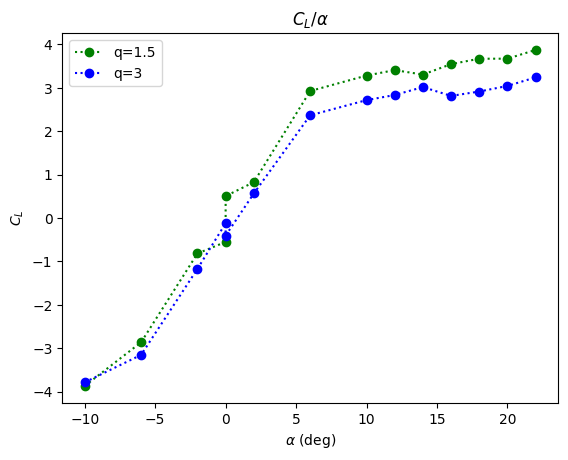

In [ ]:
# add non-dimensionalized bits to dynamic tare
dt["lift_coefficient"] = dt["Lift (lb)"].div(dt["Q (psf)"])
dt["drag_coefficient"] = dt["Drag (lb)"].div(dt["Q (psf)"])
dt["moment_coefficient"] = dt["Pitch (lb-ft)"].div(dt["Q (psf)"])

# Find the dynamic tare that matches the target best
q_1_target = 1.5
run_1_dt = dt.iloc[(dt["Q (psf)"] - q_1_target).abs().argsort()[:1]]
q_2_target = 3
run_2_dt = dt.iloc[(dt["Q (psf)"] - q_2_target).abs().argsort()[:1]]

# wing shape vars
in_to_ft = 12
span = 7.1 / in_to_ft
chord_root = 3.17 / in_to_ft
chord_tip = 1.57 / in_to_ft
# wing is trapezoidal
wing_area = 0.5 * (chord_root + chord_tip) * span / 2

# apply static tares
run_1["Lift (lb)"] = run_1["Lift (lb)"] - static_tare["Lift (lb)"]
run_1["Drag (lb)"] = run_1["Drag (lb)"] - static_tare["Drag (lb)"]
run_1["Pitch (lb-ft)"] = run_1["Pitch (lb-ft)"] - static_tare["Pitch (lb-ft)"]

run_2["Lift (lb)"] = run_2["Lift (lb)"] - static_tare["Lift (lb)"]
run_2["Drag (lb)"] = run_2["Drag (lb)"] - static_tare["Drag (lb)"]
run_2["Pitch (lb-ft)"] = run_2["Pitch (lb-ft)"] - static_tare["Pitch (lb-ft)"]

# adjust moment center
dx = 0.847 / 12
dy = 3.125 / 12
run_1["Pitch (lb-ft)"] = (
    run_1["Pitch (lb-ft)"] + dy * run_1["Drag (lb)"] - dx * run_1["Lift (lb)"]
)
run_2["Pitch (lb-ft)"] = (
    run_2["Pitch (lb-ft)"] + dy * run_2["Drag (lb)"] - dx * run_2["Lift (lb)"]
)

# run 1 coefficients
run_1["lift_coefficient"] = run_1["Lift (lb)"].div(run_1["Q (psf)"] * wing_area)
run_1["drag_coefficient"] = run_1["Drag (lb)"].div(run_1["Q (psf)"] * wing_area)
run_1["moment_coefficient"] = run_1["Pitch (lb-ft)"].div(run_1["Q (psf)"] * wing_area)
run_1.lift_coefficient = run_1.lift_coefficient - run_1_dt.lift_coefficient.values[0]
run_1.drag_coefficient = run_1.drag_coefficient - run_1_dt.drag_coefficient.values[0]
run_1.moment_coefficient = (
    run_1.moment_coefficient - run_1_dt.moment_coefficient.values[0]
)

# run 2 coefficients
run_2["lift_coefficient"] = run_2["Lift (lb)"].div(run_2["Q (psf)"] * wing_area)
run_2["drag_coefficient"] = run_2["Drag (lb)"].div(run_2["Q (psf)"] * wing_area)
run_2["moment_coefficient"] = run_2["Pitch (lb-ft)"].div(run_2["Q (psf)"] * wing_area)
run_2.lift_coefficient = run_2.lift_coefficient - run_2_dt.lift_coefficient.values[0]
run_2.drag_coefficient = run_2.drag_coefficient - run_2_dt.drag_coefficient.values[0]
run_2.moment_coefficient = (
    run_2.moment_coefficient - run_2_dt.moment_coefficient.values[0]
)

run_1_sorted = run_1.sort_values(by="Alpha (deg)")
run_2_sorted = run_2.sort_values(by="Alpha (deg)")

fig, ax = plt.subplots()
ax.set_xlabel("$\\alpha$ (deg)")
ax.set_ylabel("$C_L$")
ax.set_title("$C_L / \\alpha$")
(line_1,) = ax.plot(run_1_sorted["Alpha (deg)"], run_1_sorted.lift_coefficient, "go:")
line_1.set_label("q=1.5")
(line_2,) = ax.plot(run_2_sorted["Alpha (deg)"], run_2_sorted.lift_coefficient, "bo:")
line_2.set_label("q=3")
_ = ax.legend()

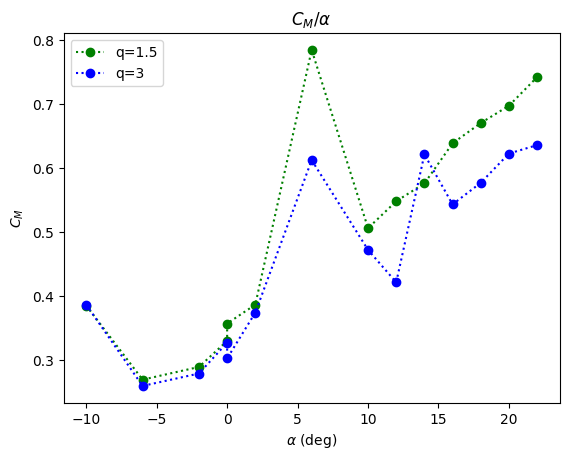

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("$\\alpha$ (deg)")
ax.set_ylabel("$C_M$")
ax.set_title("$C_M / \\alpha$")
line_1, = ax.plot(run_1_sorted["Alpha (deg)"], run_1_sorted.moment_coefficient, "go:")
line_1.set_label("q=1.5")
line_2, = ax.plot(run_2_sorted["Alpha (deg)"], run_2_sorted.moment_coefficient, "bo:")
line_2.set_label("q=3")
_ =  ax.legend()

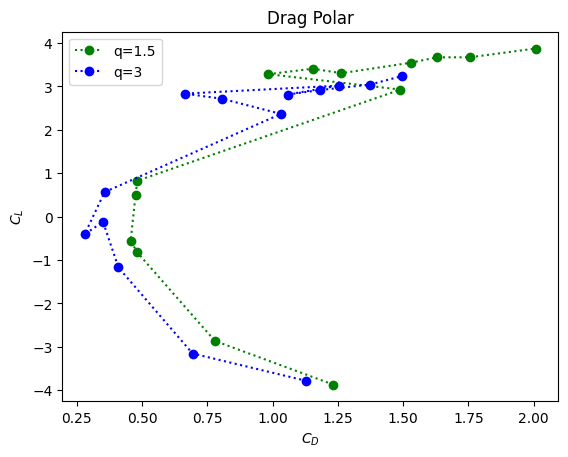

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("$C_D$")
ax.set_ylabel("$C_L$")
ax.set_title("Drag Polar")
line_1, = ax.plot(run_1_sorted.drag_coefficient, run_1_sorted.lift_coefficient, "go:")
line_1.set_label("q=1.5")
line_2, = ax.plot(run_2_sorted.drag_coefficient, run_2_sorted.lift_coefficient, "bo:")
line_2.set_label("q=3")
_ =  ax.legend()

In [ ]:
hide_cols = [
    "Run #",
    "Point #",
    "Time",
    "Beta (deg)",
    "Phi (deg)",
    "Q (psf)",
    "Side Force (lb)",
    "Yaw (lb-ft)",
    "Roll (lb-ft)",
    "Lift StDev (lb)",
    "Drag StDev (lb)",
    "Side Force StDev (lb)",
    "Pitch StDev (lb-ft)",
    "Yaw StDev (lb-ft)",
    "Roll StDev (lb-ft)",
    "Q StDev (psf)",
    "Alpha StDev (deg)",
    "Beta StDev (deg)",
    "x offset (in)",
    "y offset (in)",
    "z offset (in)",
    "Ref Area (sqf)",
    "Ref Length (ft)",
    "Re",
    "Comments",
    "Z (deg)",
    "Y (deg)",
    "X (deg)",
    "Calibration",
]
run_1.style.hide(
    hide_cols,
    axis="columns",
).relabel_index(
    [
        "Alpha (deg)",
        "Lift (lb)",
        "Drag (lb)",
        "Pitch (lb-ft)",
        "Lift Coefficient",
        "Drag Coefficient",
        "Moment Coefficient",
    ],
    axis="columns",
).format(
    {
        "Alpha (deg)": "{:.0f}",
        "Lift (lb)": "{:.3g}",
        "Drag (lb)": "{:.3g}",
        "Pitch (lb-ft)": "{:.3g}",
    }
)

,Alpha (deg),Lift (lb),Drag (lb),Pitch (lb-ft),Lift Coefficient,Drag Coefficient,Moment Coefficient
0,-0,-0.0541,0.0426,0.0301,-0.551910,0.456192,0.329803
1,-10,-0.341,0.108,0.0336,-3.869466,1.231774,0.384980
2,-6,-0.275,0.0747,0.0255,-2.864536,0.778947,0.269149
3,-2,-0.0813,0.0465,0.0274,-0.817631,0.480461,0.289001
4,2,0.0751,0.0469,0.0369,0.825571,0.481279,0.386370
5,6,0.271,0.141,0.0736,2.926462,1.489960,0.784413
6,10,0.298,0.0913,0.0464,3.283099,0.984178,0.505868
7,12,0.327,0.113,0.0532,3.408274,1.153711,0.547935
8,14,0.303,0.118,0.0533,3.305145,1.263656,0.575827
9,16,0.329,0.144,0.0599,3.546430,1.529227,0.638489


In [ ]:

run_2.style.hide(
    hide_cols,
    axis="columns",
).relabel_index(
    [
        "Alpha (deg)",
        "Lift (lb)",
        "Drag (lb)",
        "Pitch (lb-ft)",
        "Lift Coefficient",
        "Drag Coefficient",
        "Moment Coefficient",
    ],
    axis="columns",
).format(
    {
        "Alpha (deg)": "{:.0f}",
        "Lift (lb)": "{:.3g}",
        "Drag (lb)": "{:.3g}",
        "Pitch (lb-ft)": "{:.3g}",
    }
)

,Alpha (deg),Lift (lb),Drag (lb),Pitch (lb-ft),Lift Coefficient,Drag Coefficient,Moment Coefficient
0,0,-0.0205,0.0552,0.0501,-0.120445,0.350330,0.326990
1,-10,-0.627,0.188,0.0639,-3.786051,1.129784,0.386314
2,-6,-0.513,0.114,0.0422,-3.154722,0.693425,0.259371
3,-2,-0.193,0.0683,0.0454,-1.172171,0.409279,0.278764
4,2,0.0886,0.059,0.0602,0.565307,0.356212,0.373901
5,6,0.39,0.173,0.102,2.366775,1.032052,0.612203
6,10,0.446,0.135,0.0781,2.716576,0.805955,0.471878
7,14,0.503,0.212,0.104,3.017455,1.252536,0.621125
8,12,0.471,0.113,0.0705,2.834148,0.663791,0.421218
9,16,0.46,0.175,0.0893,2.813430,1.057439,0.543008
